# Práctica de aprendizaje automático (parte 1)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

1. Describe las características de los datos:
    * Tipo de datos (e.g. [https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)))
    * Número de ejemplos de cada una de las clases.
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.

Esta información se debería utilizar en el análisis; por ejemplo, si se selecciona un atributo para la predicción, ¿es clara su relevancia por el tipo de información que proporciona de acuerdo con nuestro conocimiento experto sobre el área?
    
2. Detalla la metodología utilizada:
    * Partición de los datos: tamaño de los conjuntos de entrenamiento y test, uso de estratificación en el muestreo.
    * Preprocesamiento: codificación de los atributos, construcción y selección de características, normalización, etc. (¡solo se debe utilizar la información del conjunto de entrenamiento!)
    * Determinación de los hiperparámetros; por ejemplo, mediante búsqueda en rejilla y validación cruzada.
    * Estimación del error de generalización y su incertidumbre.
2. Resume los resultados en gráficas y tablas.
3. Elabora esta información e ilustra tus observaciones con los resultados obtenidos.
4. Proporciona una recomendación final:
    * Tipo de clasificador.
    * Configuración del clasificador (arquitectura, hiperparámetros, etc.) y método de entrenamiento (función de coste, método de optimización, uso de técnicas de regularización,...)
    * Para el predictor final, proporciona los errores de entrenamiento, validación cruzada y test.
5. Resume las conclusiones del análisis.

## 0. Explora el cuaderno de Python *demo_german_credit_data.ipynb*

## 1. Construcción de clasificadores en bases de datos sintéticas (2 puntos)

In [11]:
# Fuente:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [8]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [27]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X @ np.asarray([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

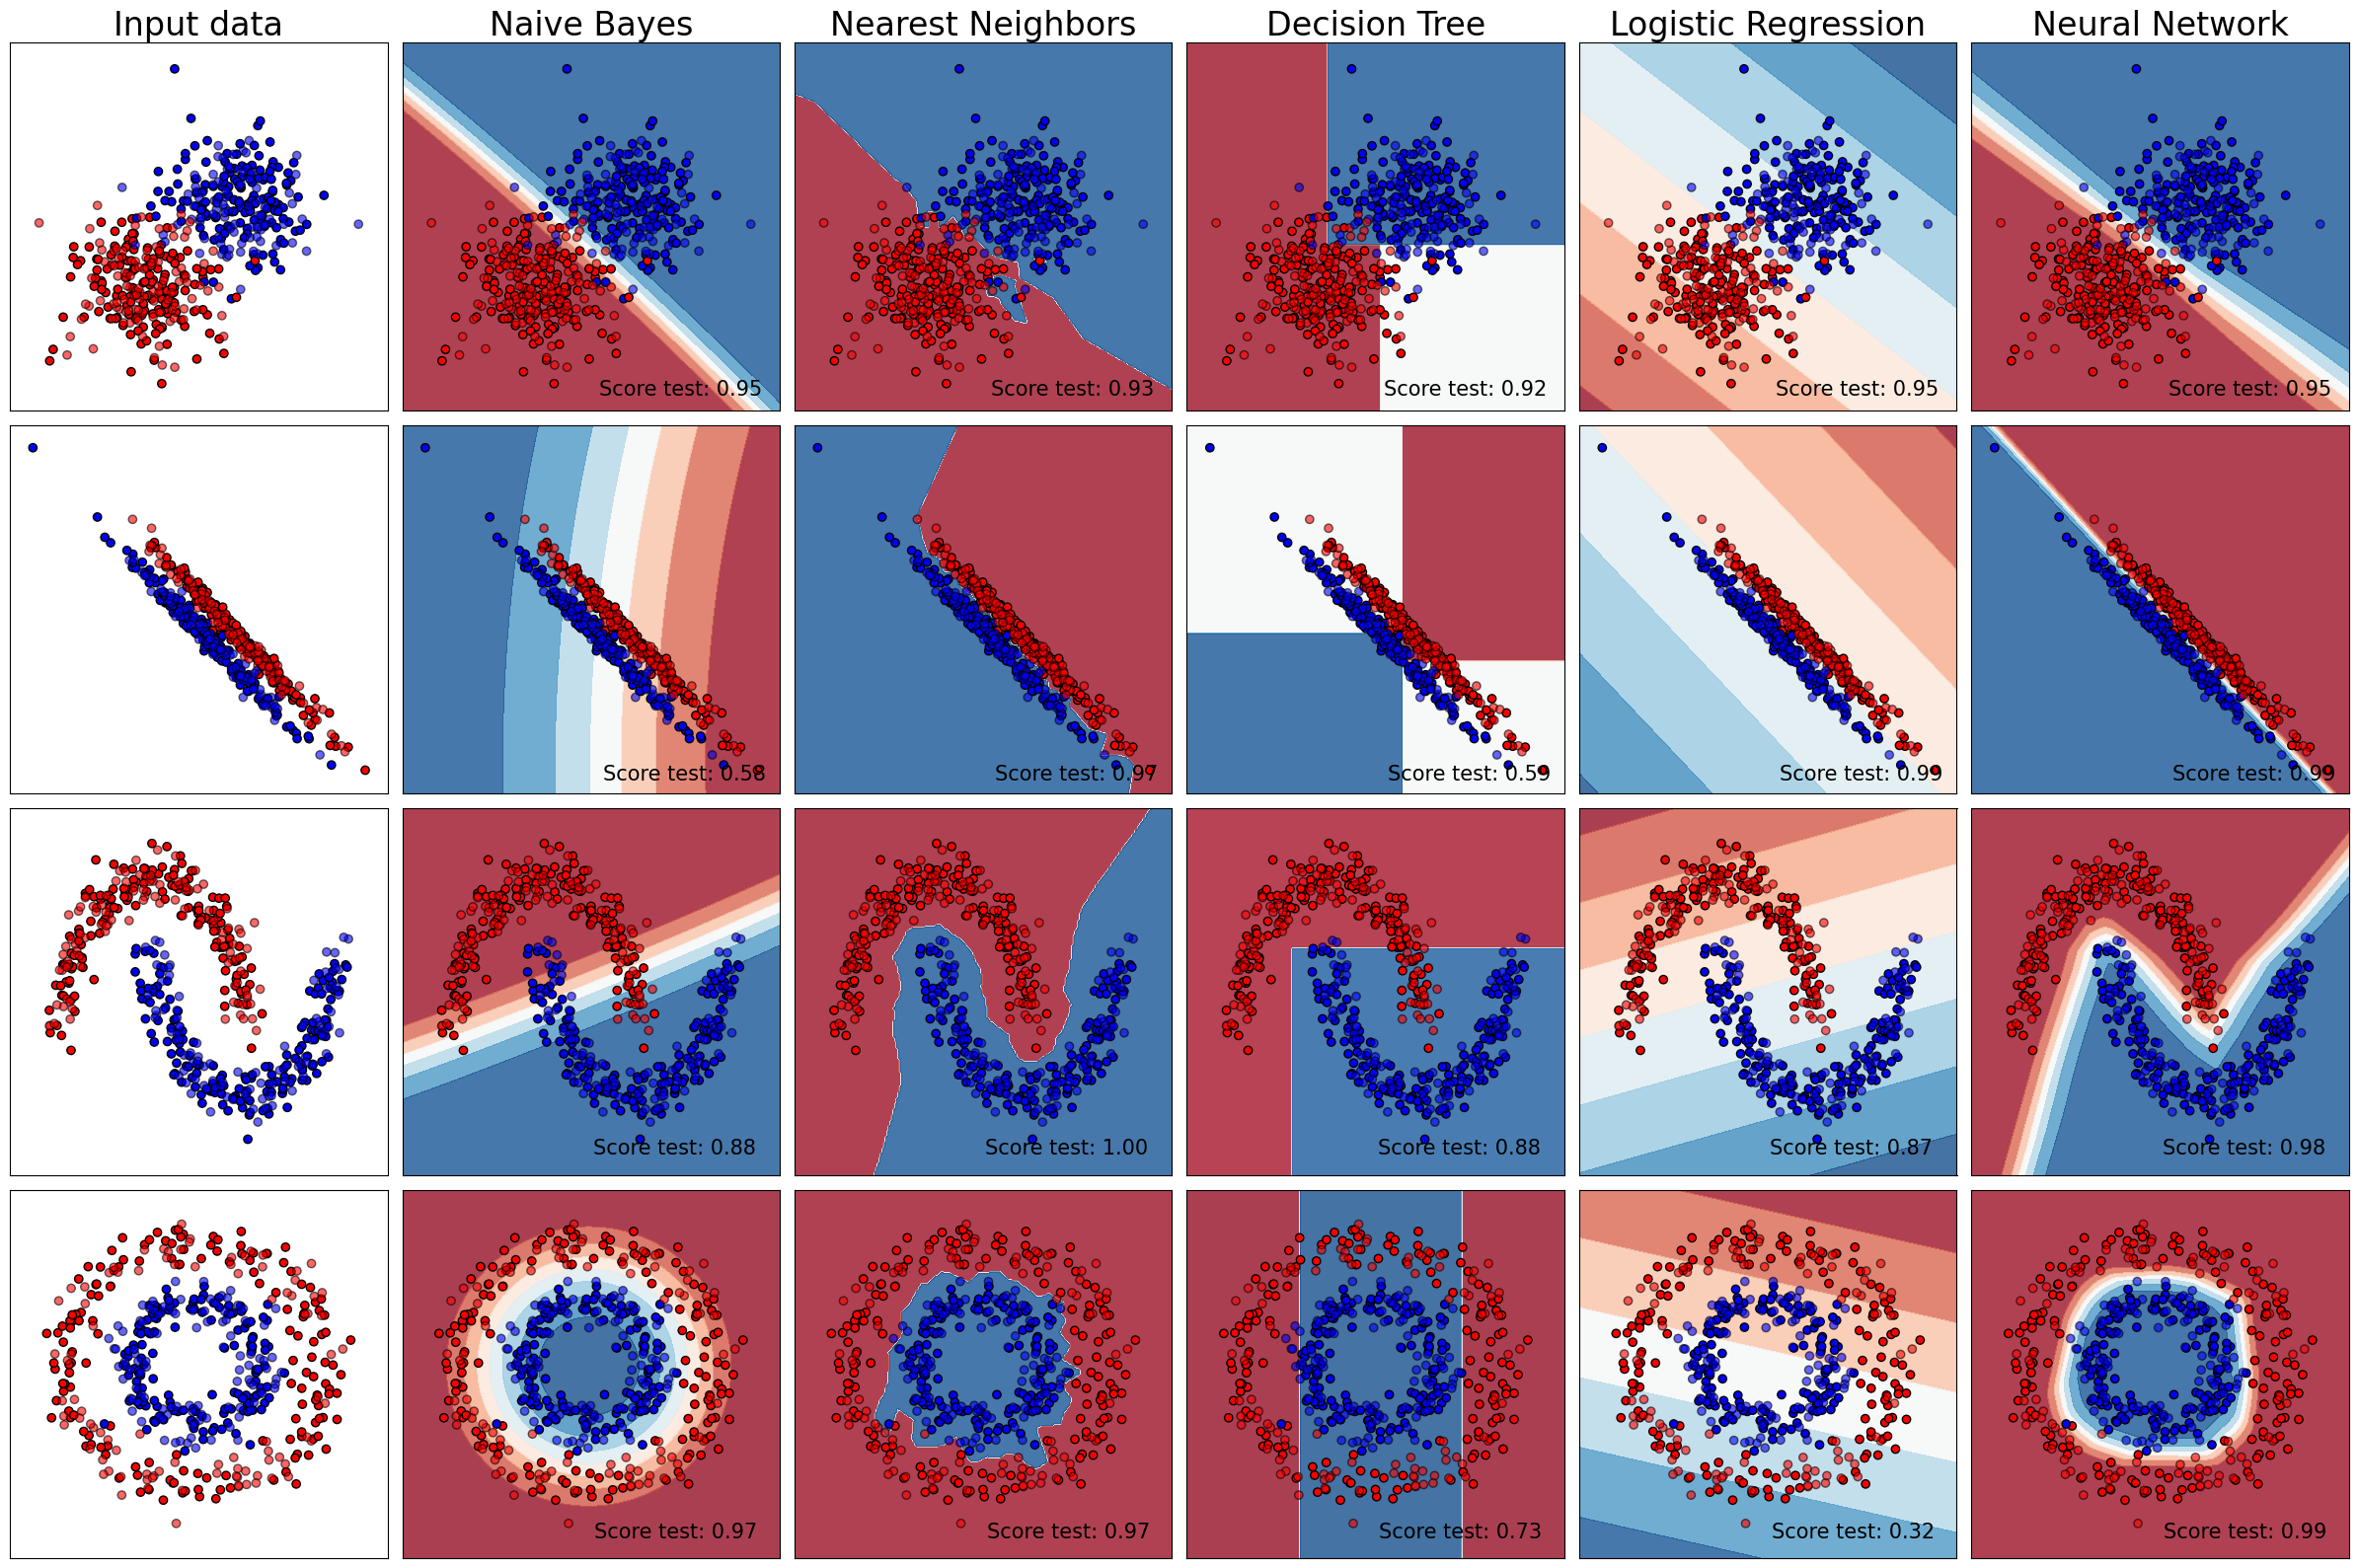

In [10]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1.0e10, solver='lbfgs')), 
               # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0.0))]

plot_classifiers(classifiers, datasets)

In [11]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(criterion='entropy', max_depth=2)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=1000)


**Prueba a cambiar los siguientes parámetros (al menos 3-5 variantes en cada caso) y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. 
    * ¿Debería ser impar cuando hay dos clases? Justifica la respuesta.
    * ¿Debería ser impar cuando hay más de dos clases? Justifica la respuesta.
* Profundidad máxima de los árboles de decisión.
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

## Parte 1 
*Sergio Hidalgo y Alexis*


#### 1. Datos a tratar

El código comienza con la creación de datos que posteriormente han de ser separados por los distintos clasificadores, se pueden observar 4 nubes de datos de distintos tipos, la primera usa la función "make_blobs" para generar 500 gotas cerca del centro 0,0 y con una desviación de 2.5 tanto en x como en y. El siguiente conjunto de datos sigue el mismo principio que el anterior, salvo que tras generar los datos en torno a 0,0 (con una desviación de 5 en x y de 1 en y) conviete pasa los datos de x a una array y desplaza la mitad para poder tener así esas 2 nubes de datos que se pueden separar con una recta. El tercer conjunto se genera mediante el uso de "make_moons" que genera dos medios circulos entrelazados (o "lunas"). Y el último conjunto son 2 circulos, uno dentro de otro, generados con "make_circles", dispone al igual que el resto de conjuntos, de 500 muestras.

En todos los casos, son datos numéricos (coordenadas asociadas a un número) y hay dos clases, la clase del 1 y la clase del 0.

#### 2. Estrategias y resultados
Se itera sobre los conjuntos de datos y durante la iteración, se utiliza la función "train_test_split", que genera conjuntos separados de tests de manera aleatoria. Tras ello se utiliza la libreria matplotlib para plotear las nubes de datos. Dentro de la misma iteración, se iterará sobre los clasificadores para que dividan ambas clases. 

- **Naive Bayes**: Es un algoritmo basado en el teorema de Bayes con una suposición de independencia entre los predictores. Las gotas las divide bien y los circulos también, las medias lunas algo peor y los datos linealmente separables le resultan más costosos. Esto se debe a que bayes asume que los datos son independientes y en el caso de los linealmente separables, no son independientes.
  
- **Nearest Neighbors**: Este algoritmo estima el valor de la probabilidad de que un elemento pertenezca a una clase, la funcion se aproxima localmente. De promedio actua bastante bien en todos los data sets, e incluso si aumentamos el número de vecinos, obtendremos un rendimiento mejor en todos ellos. El problema es que tiene un alto coste computacional, y que si se aumentan de más los vecinos, se consigue el efecto contrario al deseado.



In [6]:

def scores_iterate(classifiers, datasets):
    
    figure = plt.figure()
    scores = list()
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)

        
        # iterate over classifiers
        for name, clf in classifiers:
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            scores.append(score)
            
    plt.close()
    return scores


# --------------------------
data_score = list()
    
for i in range(1, 15):
        
        classifiers2 = [
                       ("Nearest Neighbors",
                        KNeighborsClassifier(n_neighbors=i)), # número de vecinos
                     ]
        
        data_score.append(scores_iterate(classifiers2, datasets))
        print("Para k-nn = "+ str(i)+ " los scores son : "+ str(data_score[i-1]))

even_mean = 0
odd_mean = 0
for j in range(len(data_score)):
        aux_odd_mean = 0
        aux_even_mean = 0
        if j%2 == 0:
            for score_val in data_score[j]:
                aux_even_mean += score_val

            even_mean += aux_even_mean/len(data_score[j])
        else:
            for score_val in data_score[j]:
                aux_odd_mean += score_val
            odd_mean += aux_odd_mean/len( data_score[j])
            
even_mean = even_mean/(len(data_score)/2)
odd_mean = odd_mean/(len(data_score)/2)

print()
print("Tras 14 ejecuciones, las medias de los scores son: ")
print("Even Score: " +  str(even_mean))
print("Odd Score: " +  str(odd_mean))
print()


Para k-nn = 1 los scores son : [0.97]
Para k-nn = 2 los scores son : [0.96]
Para k-nn = 3 los scores son : [0.98]
Para k-nn = 4 los scores son : [0.975]
Para k-nn = 5 los scores son : [0.99]
Para k-nn = 6 los scores son : [0.99]
Para k-nn = 7 los scores son : [0.99]
Para k-nn = 8 los scores son : [0.985]
Para k-nn = 9 los scores son : [0.98]
Para k-nn = 10 los scores son : [0.985]
Para k-nn = 11 los scores son : [0.98]
Para k-nn = 12 los scores son : [0.98]
Para k-nn = 13 los scores son : [0.98]
Para k-nn = 14 los scores son : [0.98]

Tras 14 ejecuciones, las medias de los scores son: 
Even Score: 0.9814285714285715
Odd Score: 0.9792857142857143



Como se puede comprobar la media de la puntuación impar al aumentar en vecinos impares, es mayor. Esto se debe a que seguramente, evite desempates (hay que tener en cuenta que tenemos 2 clases, 1 y 0). Así mismo, si tenemos más de 2 clases, es más difícil que puedan llegar a empatar.

- **Decision Tree**: En particular, su funcionamiento se basa en la creación de un conjunto de reglas, basadas en los atributos, que determinan si es una clase u otra, como su nombre indica, a través de estas reglas se formaría un arbol de decisión. Los árboles dividien parcialmente bien el en el caso de las gotas y aunque algo peor, las lunas, no obstante el linearmente separable y los círculos no los hace muy bien, esto se debe a que las reglas son en base a los ejes x e y, por lo que aquellos datasets que se dividan en diagonal, o estén incluidos uno en otro, serán menos eficientes.

In [36]:

data_score_decission= list()
for i in range(1, 19):

        classifiers3 = [("Decision Tree",
                        DecisionTreeClassifier(criterion='entropy', max_depth=i))]
        
        data_score_decission.append(scores_iterate(classifiers3, datasets))
        
classifiers3 = [("Decision Tree",
                        DecisionTreeClassifier(criterion='entropy'))]
        
data_score_decission.append(scores_iterate(classifiers3, datasets))

finalscore = 0

for i in data_score_decission[0]:
    finalscore += i
    
final_score = finalscore/len(data_score_decission[0])
final_prof = 0

for i in range(0, len(data_score_decission)):
    aux_score = 0
    
    for j in data_score_decission[i]:
        aux_score += j
        
    aux_score = aux_score/len(data_score_decission[i])


    if aux_score > final_score:
        final_score = aux_score

        final_prof = i
    
    print("Decision Tree with ", end="") 
    if i == 18:
    
        print("None", end="")
    else:
        print(str(i), end="")
    
    print(" max depth and scores of " + str(data_score_decission[i]))
    
print()

print("Mayor puntuación media: "+str(final_score))

if final_prof == 18:
        i = None
print("Con profundidad máxima de " + str(final_prof))
    



Decision Tree with 0 max depth and scores of [0.875, 0.595, 0.785, 0.615]
Decision Tree with 1 max depth and scores of [0.92, 0.595, 0.875, 0.735]
Decision Tree with 2 max depth and scores of [0.93, 0.76, 0.875, 0.82]
Decision Tree with 3 max depth and scores of [0.91, 0.79, 0.89, 0.93]
Decision Tree with 4 max depth and scores of [0.92, 0.91, 0.955, 0.93]
Decision Tree with 5 max depth and scores of [0.915, 0.92, 0.955, 0.94]
Decision Tree with 6 max depth and scores of [0.905, 0.93, 0.955, 0.94]
Decision Tree with 7 max depth and scores of [0.905, 0.93, 0.955, 0.94]
Decision Tree with 8 max depth and scores of [0.905, 0.925, 0.955, 0.93]
Decision Tree with 9 max depth and scores of [0.905, 0.93, 0.955, 0.94]
Decision Tree with 10 max depth and scores of [0.905, 0.93, 0.955, 0.94]
Decision Tree with 11 max depth and scores of [0.91, 0.93, 0.955, 0.94]
Decision Tree with 12 max depth and scores of [0.905, 0.93, 0.955, 0.94]
Decision Tree with 13 max depth and scores of [0.905, 0.93, 0.

Los valores de varias de las puntuaciones de algunas profundidades son semejantes, lo cual señala que un conjunto de profundidades es óptimo dentro de los árboles de decisión. Lo que se puede asegurar con certeza es que es mejor fijar un valor máximo que no fijarlo (a menos que se vaya a fijar uno muy pequeño), por términos de coste de computación (pues desplegar todas las ramas es muy poco eficiente). 

- **Logistic Regression**: En la regresión logística se utilizan los valores para predecir la probabilidad de que la clase tenga un valor (por tanto los valores resultantes de la regresión, tienen que estar entre 0 y 1), es una regresión lineal a la que se le ha aplicado una función para acotar sus valores. Este algoritmo es aceptablemente bueno con las gotas y los datos linealmente separables, con las medias lunas empieza a tener unas pocas dificultades y a la hora de analizar los círculos falla considerablemente, esto se debe a que al estar una clase dentro de la otra, no tiene manera de predecir a través de la regresión logistica si es una u otra, pues la probabilidad de que sea la de dentro se solapa con que sea la externa.


- **Neural Network**: Este estimador funciona realizando una regresion logistica en cada una de las neuronas, imita el comportamiento del cerebro humano "activando" o no las neuronas. Las redes neuronales son óptimas para todos los conjuntos de datos.

In [10]:
def score_iterate_neurons(classifiers, datasets, train):

    figure = plt.figure()
    scores = list()
    h = .02  # step size in the mesh
    i = 1
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            train_size=train, # tamaño de entrenamiento
                                                            random_state=0) # random_state 0 para el mismo resultado
   
 
        # iterate over classifiers
        for name, clf in classifiers:
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            scores.append(score)

    plt.close()
    return scores

#----------------------------------------------------
hidden_layers = [(10,),(20,),(50,), (50,10,), (50, 20,), (50,10,20,)]
train_sizes = [i for i in np.arange(0.1, 1.0, 0.1)] # valores entre el 0.0 y el 0.1 (no incluidos)
scores = list()

# data preparation (se ha añadido más datos)
simple = make_blobs(n_samples=2000, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=2000, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X @ np.asarray([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets2 = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=2000),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=2000)
           ]

for i in range (len(hidden_layers)):
    scores_layers = list()

    for j in range(len(train_sizes)):
    
        classifiers6 = [("Neural Network",
                         MLPClassifier(hidden_layer_sizes=hidden_layers[i],max_iter=10000, alpha=0.0)),
                       ]
        scores_layers.append(score_iterate_neurons(classifiers6, datasets, train_sizes[j]))
    scores.append(scores_layers)
    
for i in range(len(scores)):
    print("Para las capas ocultas:", hidden_layers[i]) 
    best_mean= 0.1
    best_train= 0.1
    for j in range(len(scores[i])):
        print("\tCon un tamaño de entrenamiento de", '%.1f'%(train_sizes[j]), "se tiene una media de ", end="")
        score_mean=0
        for score in scores[i][j]:
            score_mean+=score

        score_mean= score_mean/len(scores[i][j])
        print(str('%.4f'%(score_mean)))

        if score_mean > best_mean:
            best_mean = score_mean
            best_train = train_sizes[j]

    print("\tEl mejor entrenamiento es el de tamaño " + str('%.1f'%(best_train)) + " con una media de "+ str('%.4f'%(best_mean)))
    print()
        
        


Para las capas ocultas: (10,)
	Con un tamaño de entrenamiento de 0.1 se tiene una media de 0.9689
	Con un tamaño de entrenamiento de 0.2 se tiene una media de 0.9500
	Con un tamaño de entrenamiento de 0.3 se tiene una media de 0.9421
	Con un tamaño de entrenamiento de 0.4 se tiene una media de 0.9475
	Con un tamaño de entrenamiento de 0.5 se tiene una media de 0.9450
	Con un tamaño de entrenamiento de 0.6 se tiene una media de 0.9400
	Con un tamaño de entrenamiento de 0.7 se tiene una media de 0.9400
	Con un tamaño de entrenamiento de 0.8 se tiene una media de 0.9750
	Con un tamaño de entrenamiento de 0.9 se tiene una media de 0.9700
	El mejor entrenamiento es el de tamaño 0.8 con una media de 0.9750

Para las capas ocultas: (20,)
	Con un tamaño de entrenamiento de 0.1 se tiene una media de 0.9667
	Con un tamaño de entrenamiento de 0.2 se tiene una media de 0.9475
	Con un tamaño de entrenamiento de 0.3 se tiene una media de 0.9471
	Con un tamaño de entrenamiento de 0.4 se tiene una med

Como se puede apreciar no parece que  el tamaño óptimo de entrenamiento se encuentra entre 0.8 - 0.9, así mismo, con el mismo tamaño de entrenamiento, un mayor número de capas, suele en bastantes casos, ocasionar una mayor media de puntuación, aunque suele haber un número de neuronas y capas óptimas para un conjunto de datos. 